In [1]:
import random
from functions import solve_fjs_with_parallel_machines
from functions import generate_random_instance
from functions import plot_gantt
from functions import SchedulingProblem
from genetic import GeneticAlgorithm
from simulated_annealing import SimulatedAnnealing

Jobs: 20, Centers: {'C1': 2, 'C2': 2, 'C3': 2, 'C4': 2}
Objective value = alpha * C_max + (1 - alpha) * Σ wj·Tj = 1105.0



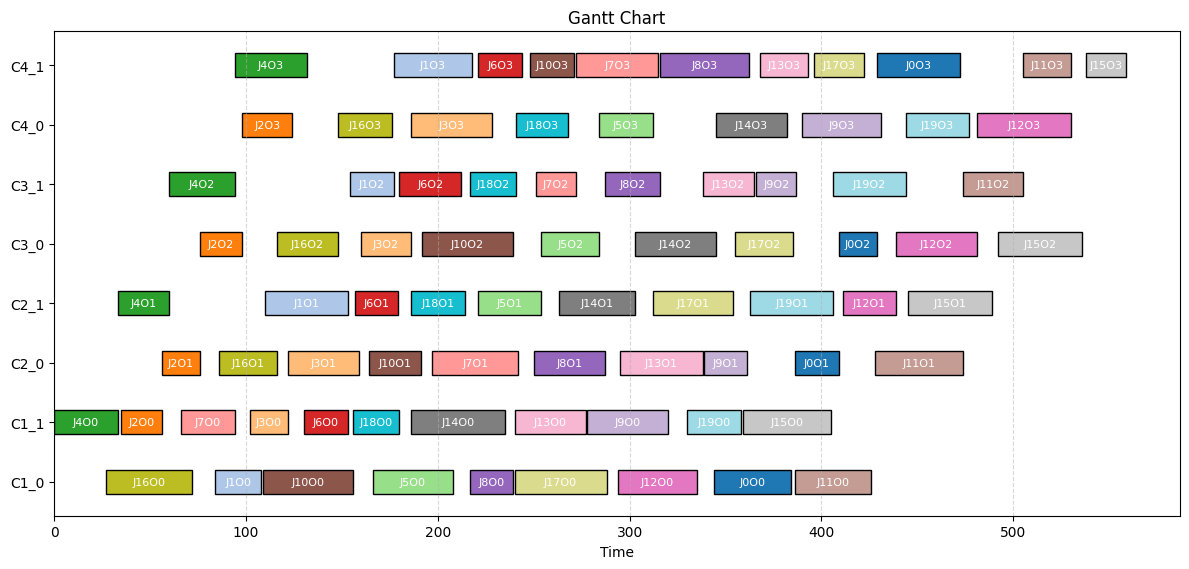

In [2]:
# 1. 生成隨機實例
random.seed(42)
alpha = 0.5
jobs_data, release_dates, due_dates, weights, setup_times, center_caps = generate_random_instance()

# 2. 求解
schedule, obj = solve_fjs_with_parallel_machines(
    jobs_data, release_dates, due_dates, weights, setup_times, center_caps, alpha
)

# 3. 輸出結果
print(f"Jobs: {len(jobs_data)}, Centers: {center_caps}")
print(f"Objective value = alpha * C_max + (1 - alpha) * Σ wj·Tj = {obj}\n")
plot_gantt(schedule)

In [3]:
machs, times = {}, {}
for j, ops in schedule.items():
    for o, m, start, end in ops:
        machs[(j,o)] = m
        times[(j,o)] = (start, end)

seed_solution = (machs, times)
problem = SchedulingProblem(jobs_data, release_dates, due_dates, weights, setup_times, center_caps, alpha)

Objective value = 924.5



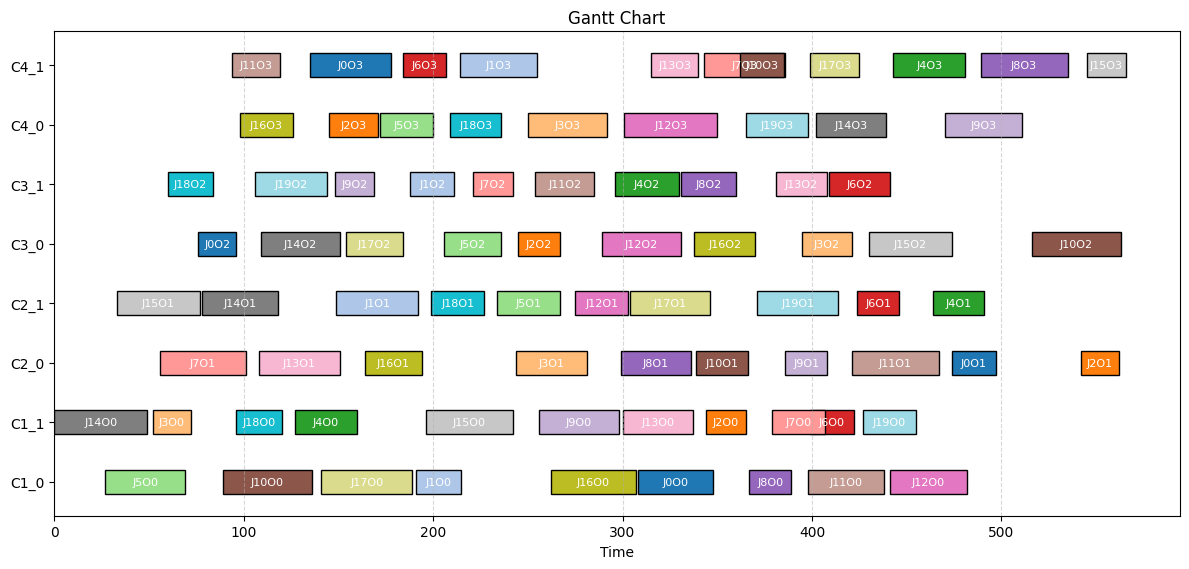

In [4]:
SA = SimulatedAnnealing(problem, initial_temperature = 1000, min_temperature = 0.001, max_iteration = 1000, steps = 100)
best_obj, best_schedule = SA.run(seed_solution)
print(f"Objective value = {best_obj}\n")
best_schedule = problem.generate_schedule(best_schedule[0], best_schedule[1])
plot_gantt(best_schedule)

Objective value = 1061.0



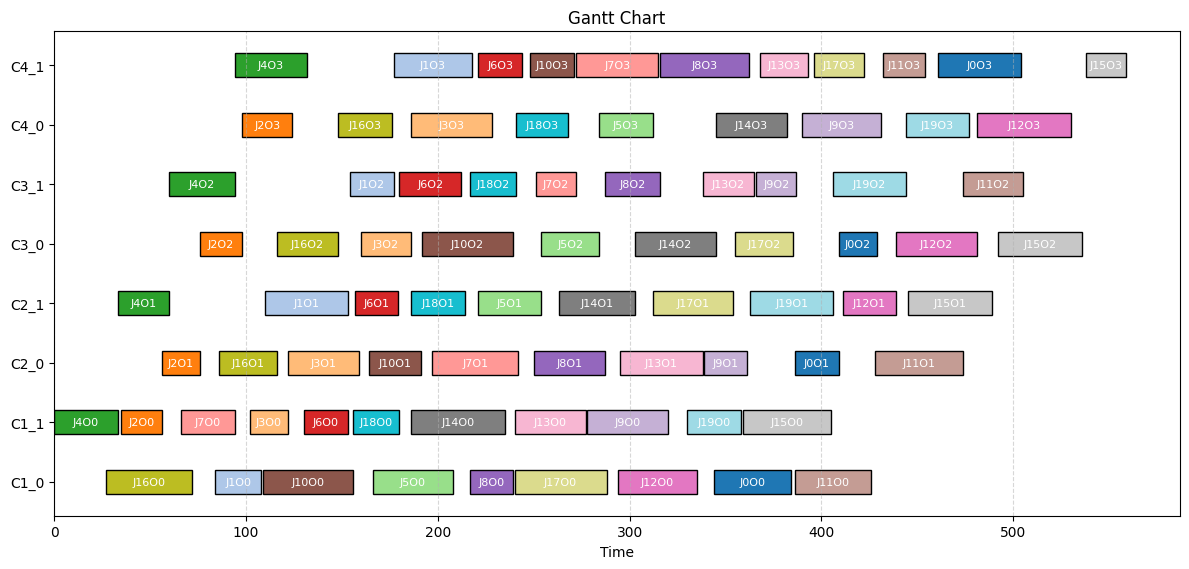

In [5]:
GA = GeneticAlgorithm(problem, pop_size = 500, max_generations = 100)
best_obj, best_schedule = GA.run(seed_solution)
print(f"Objective value = {best_obj}\n")
best_schedule = problem.generate_schedule(best_schedule[0], best_schedule[1])
plot_gantt(best_schedule)